In [1]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sb

#from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
#import joblib
#from sklearn.model_selection import ShuffleSplit
#from sklearn.model_selection import KFold
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras

from os import walk

import time
import datetime

%matplotlib inline

In [2]:
pathBase = 'I://Chuan//Documents//MyData//ProjNormalCAG//CoroBase//Arrangement//'
#pathBase = 'E://Chuan//Documents//Database//DICOM//CoroBase//Arrangement//'

theWhole = {}
# theWhole is dictionary containing views (keys) which the values are DICOM files

f = []
f_LCA_Caudal = []
mypath_LCA_Caudal = pathBase + 'LCA_Caudal'
for (dirpath, dirnames, filenames) in walk(mypath_LCA_Caudal):
    f.extend(filenames)
for l in f:
    f_LCA_Caudal.append(mypath_LCA_Caudal + '\\' + l) 
    
f = []
f_LCA_Cranial = []
mypath_LCA_Cranial = pathBase + 'LCA_Cranial'
for (dirpath, dirnames, filenames) in walk(mypath_LCA_Cranial):
    f.extend(filenames)
for l in f:
    f_LCA_Cranial.append(mypath_LCA_Cranial + '\\' + l) 
    
f = []
f_LCA_Cranial_LAO = []
mypath_LCA_Cranial_LAO = pathBase + 'LCA_Cranial_LAO'
for (dirpath, dirnames, filenames) in walk(mypath_LCA_Cranial_LAO):
    f.extend(filenames)
for l in f:
    f_LCA_Cranial_LAO.append(mypath_LCA_Cranial_LAO + '\\' + l) 
    
    
f = []
f_LCA_Cranial_RAO = []
mypath_LCA_Cranial_RAO = pathBase + 'LCA_Cranial_RAO'
for (dirpath, dirnames, filenames) in walk(mypath_LCA_Cranial_RAO):
    f.extend(filenames)
for l in f:
    f_LCA_Cranial_RAO.append(mypath_LCA_Cranial_RAO + '\\' + l) 
    
f = []
f_LCA_Spider = []
mypath_LCA_Spider = pathBase + 'LCA_Spider'
for (dirpath, dirnames, filenames) in walk(mypath_LCA_Spider):
    f.extend(filenames)
for l in f:
    f_LCA_Spider.append(mypath_LCA_Spider + '\\' + l) 
    
f = []
f_RCA_Cranial = []
mypath_RCA_Cranial = pathBase + 'RCA_Cranial'
for (dirpath, dirnames, filenames) in walk(mypath_RCA_Cranial):
    f.extend(filenames)
for l in f:
    f_RCA_Cranial.append(mypath_RCA_Cranial + '\\' + l) 
    
f = []
f_RCA_LAO = []
mypath_RCA_LAO = pathBase + 'RCA_LAO'
for (dirpath, dirnames, filenames) in walk(mypath_RCA_LAO):
    f.extend(filenames)
for l in f:
    f_RCA_LAO.append(mypath_RCA_LAO + '\\' + l) 
    

theWhole['LCA_Caudal'] = f_LCA_Caudal
theWhole['LCA_Cranial'] = f_LCA_Cranial
theWhole['LCA_Cranial_LAO'] = f_LCA_Cranial_LAO
theWhole['LCA_Cranial_RAO'] = f_LCA_Cranial_RAO
theWhole['LCA_Spider'] = f_LCA_Spider
theWhole['RCA_Cranial'] = f_RCA_Cranial
theWhole['RCA_LAO'] = f_RCA_LAO

In [3]:
viewConvert = {'LCA_Caudal': 0, 
               'LCA_Cranial': 1,
               'LCA_Cranial_LAO': 2,
               'LCA_Cranial_RAO': 3,
               'LCA_Spider': 4,
               'RCA_Cranial': 5,
               'RCA_LAO': 6}

In [4]:
theWhole['LCA_Cranial_LAO']

['I://Chuan//Documents//MyData//ProjNormalCAG//CoroBase//Arrangement//LCA_Cranial_LAO\\04A303A242F04B35BC889915B414E048.avi',
 'I://Chuan//Documents//MyData//ProjNormalCAG//CoroBase//Arrangement//LCA_Cranial_LAO\\04A303A242F04B35BC889915B414E048.dcm_average.npy',
 'I://Chuan//Documents//MyData//ProjNormalCAG//CoroBase//Arrangement//LCA_Cranial_LAO\\07FFCD52CE914F29B7E4BC877FDE039C.avi',
 'I://Chuan//Documents//MyData//ProjNormalCAG//CoroBase//Arrangement//LCA_Cranial_LAO\\07FFCD52CE914F29B7E4BC877FDE039C.dcm_average.npy',
 'I://Chuan//Documents//MyData//ProjNormalCAG//CoroBase//Arrangement//LCA_Cranial_LAO\\082257329B3A4223B258DCBAB5C11DEA.avi',
 'I://Chuan//Documents//MyData//ProjNormalCAG//CoroBase//Arrangement//LCA_Cranial_LAO\\082257329B3A4223B258DCBAB5C11DEA.dcm_average.npy',
 'I://Chuan//Documents//MyData//ProjNormalCAG//CoroBase//Arrangement//LCA_Cranial_LAO\\0AFD257E3761428881D7A2FFAC11F8D3.avi',
 'I://Chuan//Documents//MyData//ProjNormalCAG//CoroBase//Arrangement//LCA_Cranial_

In [5]:
start = time.time()

array = {}
i = 0

for view in theWhole.keys():
    array[view] = []
    for case in theWhole[view]:
        if case.split('.')[-1] == 'npy':
            arr = np.load(case)
            array[view].append(arr)

end = time.time()
print(end - start)

2.773024797439575


### 2D to 1D

In [6]:
array_flat = {}

for view in array.keys():
    array_flat[view] = []
    for case in array[view]:
        case_flat = []
        for row in case:
            for column in row:
                case_flat.append(column)            
        array_flat[view].append(case_flat)

## Neural Network

In [7]:
x_sample_list = []
y_sample_list = []

for y, x in array_flat.items():    
    for x_item in x:
        x_sample_list.append(x_item)
        y_sample_list.append(y)

In [8]:
len(x_sample_list)

954

In [9]:
len(x_sample_list[0])

262144

In [10]:
512*512

262144

In [11]:
len(y_sample_list)

954

In [12]:
y_sample_list

['LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caud

In [13]:
y_sample_digital_list = []
for item in y_sample_list:
    y_sample_digital_list.append(viewConvert[item])

### Model

In [14]:
model = Sequential()
model.add(Dense(800, activation='relu', kernel_initializer='he_normal', input_shape=(262144, )))
model.add(Dense(200, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(100, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(80, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(30, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(7, activation='softmax'))

#### Tensorboard Initilization

In [15]:
%load_ext tensorboard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

#### Compile the model

In [16]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Training

In [17]:
start = time.time()

X_train = np.array(x_sample_list)
y_train = np.array(y_sample_digital_list)

In [25]:
model.fit(X_train, y_train, epochs=500, batch_size=200, verbose=1, 
          validation_data=(X_test, y_test),
          callbacks=[tensorboard_callback])

end = time.time()

Epoch 1/500
1/5 [=====>........................] - ETA: 0s - loss: 309.0016 - accuracy: 0.1450WARNING:tensorflow:From C:\Anaconda3\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
5/5 [==============================] - 19s 4s/step - loss: 20002.7949 - accuracy: 0.1310 - val_loss: 30458.0469 - val_accuracy: 0.1429
Epoch 2/500
5/5 [==============================] - 28s 6s/step - loss: 42253.4844 - accuracy: 0.1635 - val_loss: 55066.1992 - val_accuracy: 0.1429
Epoch 3/500
5/5 [==============================] - 22s 4s/step - loss: 31958.8633 - accuracy: 0.1646 - val_loss: 35938.7539 - val_accuracy: 0.1429
Epoch 4/500
5/5 [==============================] - 18s 4s/step - loss: 25225.8613 - accuracy: 0.1426 - val_loss: 23939.4941 - val_accuracy: 0.1429
Epoch 5/500
5/5 [==============================] - 18s 4s/st

5/5 [==============================] - 17s 3s/step - loss: 132.5821 - accuracy: 0.6153 - val_loss: 50.2522 - val_accuracy: 0.8143
Epoch 56/500
5/5 [==============================] - 17s 3s/step - loss: 80.6964 - accuracy: 0.6960 - val_loss: 64.2650 - val_accuracy: 0.7143
Epoch 57/500
5/5 [==============================] - 17s 3s/step - loss: 92.6379 - accuracy: 0.6667 - val_loss: 152.4645 - val_accuracy: 0.4857
Epoch 58/500
5/5 [==============================] - 17s 3s/step - loss: 130.2284 - accuracy: 0.5692 - val_loss: 168.1074 - val_accuracy: 0.5143
Epoch 59/500
5/5 [==============================] - 18s 4s/step - loss: 93.6591 - accuracy: 0.6342 - val_loss: 71.5759 - val_accuracy: 0.6143
Epoch 60/500
5/5 [==============================] - 17s 3s/step - loss: 68.8875 - accuracy: 0.7055 - val_loss: 140.4713 - val_accuracy: 0.5429
Epoch 61/500
5/5 [==============================] - 17s 3s/step - loss: 88.1517 - accuracy: 0.6730 - val_loss: 70.3947 - val_accuracy: 0.6571
Epoch 62/500
5

5/5 [==============================] - 17s 3s/step - loss: 68.0459 - accuracy: 0.7327 - val_loss: 141.2812 - val_accuracy: 0.5000
Epoch 113/500
5/5 [==============================] - 17s 3s/step - loss: 115.3232 - accuracy: 0.6321 - val_loss: 88.3416 - val_accuracy: 0.6286
Epoch 114/500
5/5 [==============================] - 17s 3s/step - loss: 106.0649 - accuracy: 0.6457 - val_loss: 167.5266 - val_accuracy: 0.5857
Epoch 115/500
5/5 [==============================] - 17s 3s/step - loss: 115.6235 - accuracy: 0.6405 - val_loss: 75.6343 - val_accuracy: 0.7857
Epoch 116/500
5/5 [==============================] - 17s 3s/step - loss: 113.0727 - accuracy: 0.6509 - val_loss: 133.9638 - val_accuracy: 0.5714
Epoch 117/500
5/5 [==============================] - 17s 3s/step - loss: 174.4407 - accuracy: 0.6415 - val_loss: 235.7460 - val_accuracy: 0.5571
Epoch 118/500
5/5 [==============================] - 18s 4s/step - loss: 174.4700 - accuracy: 0.6090 - val_loss: 258.5350 - val_accuracy: 0.5571
Ep

5/5 [==============================] - 18s 4s/step - loss: 19.2254 - accuracy: 0.8679 - val_loss: 26.3600 - val_accuracy: 0.8286
Epoch 170/500
5/5 [==============================] - 18s 4s/step - loss: 16.4986 - accuracy: 0.8816 - val_loss: 28.3604 - val_accuracy: 0.8571
Epoch 171/500
5/5 [==============================] - 18s 4s/step - loss: 34.4280 - accuracy: 0.8019 - val_loss: 53.8533 - val_accuracy: 0.7000
Epoch 172/500
5/5 [==============================] - 18s 4s/step - loss: 35.0872 - accuracy: 0.7862 - val_loss: 54.8678 - val_accuracy: 0.6714
Epoch 173/500
5/5 [==============================] - 18s 4s/step - loss: 28.0957 - accuracy: 0.8333 - val_loss: 41.2294 - val_accuracy: 0.7286
Epoch 174/500
5/5 [==============================] - 18s 4s/step - loss: 22.9438 - accuracy: 0.8459 - val_loss: 25.6457 - val_accuracy: 0.8000
Epoch 175/500
5/5 [==============================] - 18s 4s/step - loss: 17.0064 - accuracy: 0.8795 - val_loss: 36.6257 - val_accuracy: 0.7714
Epoch 176/500

5/5 [==============================] - 18s 4s/step - loss: 39.0372 - accuracy: 0.7767 - val_loss: 44.1804 - val_accuracy: 0.7429
Epoch 227/500
5/5 [==============================] - 18s 4s/step - loss: 38.2947 - accuracy: 0.7851 - val_loss: 66.3001 - val_accuracy: 0.7000
Epoch 228/500
5/5 [==============================] - 17s 3s/step - loss: 45.7590 - accuracy: 0.7788 - val_loss: 80.3595 - val_accuracy: 0.6286
Epoch 229/500
5/5 [==============================] - 18s 4s/step - loss: 92.2135 - accuracy: 0.6761 - val_loss: 49.0472 - val_accuracy: 0.7714
Epoch 230/500
5/5 [==============================] - 18s 4s/step - loss: 53.1021 - accuracy: 0.7673 - val_loss: 62.9462 - val_accuracy: 0.7286
Epoch 231/500
5/5 [==============================] - 17s 3s/step - loss: 32.2932 - accuracy: 0.8103 - val_loss: 26.2061 - val_accuracy: 0.8571
Epoch 232/500
5/5 [==============================] - 18s 4s/step - loss: 20.1316 - accuracy: 0.8543 - val_loss: 27.6537 - val_accuracy: 0.8857
Epoch 233/500

5/5 [==============================] - 18s 4s/step - loss: 11.4279 - accuracy: 0.9067 - val_loss: 41.4487 - val_accuracy: 0.7857
Epoch 284/500
5/5 [==============================] - 18s 4s/step - loss: 17.8702 - accuracy: 0.8763 - val_loss: 40.8607 - val_accuracy: 0.8143
Epoch 285/500
5/5 [==============================] - 17s 3s/step - loss: 13.3531 - accuracy: 0.9025 - val_loss: 32.6685 - val_accuracy: 0.7857
Epoch 286/500
5/5 [==============================] - 18s 4s/step - loss: 10.3782 - accuracy: 0.9193 - val_loss: 32.2329 - val_accuracy: 0.7857
Epoch 287/500
5/5 [==============================] - 18s 4s/step - loss: 10.6867 - accuracy: 0.9161 - val_loss: 29.1844 - val_accuracy: 0.8143
Epoch 288/500
5/5 [==============================] - 18s 4s/step - loss: 11.1995 - accuracy: 0.9078 - val_loss: 32.1550 - val_accuracy: 0.8429
Epoch 289/500
5/5 [==============================] - 18s 4s/step - loss: 11.3742 - accuracy: 0.8973 - val_loss: 31.2509 - val_accuracy: 0.8286
Epoch 290/500

5/5 [==============================] - 18s 4s/step - loss: 22.3035 - accuracy: 0.8396 - val_loss: 33.1367 - val_accuracy: 0.7857
Epoch 341/500
5/5 [==============================] - 18s 4s/step - loss: 12.4976 - accuracy: 0.8889 - val_loss: 29.6595 - val_accuracy: 0.8143
Epoch 342/500
5/5 [==============================] - 18s 4s/step - loss: 8.3080 - accuracy: 0.9088 - val_loss: 33.9367 - val_accuracy: 0.8143
Epoch 343/500
5/5 [==============================] - 18s 4s/step - loss: 9.8375 - accuracy: 0.9078 - val_loss: 27.1962 - val_accuracy: 0.8429
Epoch 344/500
5/5 [==============================] - 18s 4s/step - loss: 7.8795 - accuracy: 0.9308 - val_loss: 27.5145 - val_accuracy: 0.8429
Epoch 345/500
5/5 [==============================] - 17s 3s/step - loss: 7.0238 - accuracy: 0.9319 - val_loss: 42.0052 - val_accuracy: 0.7143
Epoch 346/500
5/5 [==============================] - 18s 4s/step - loss: 9.2404 - accuracy: 0.9099 - val_loss: 31.8830 - val_accuracy: 0.7857
Epoch 347/500
5/5 

5/5 [==============================] - 17s 3s/step - loss: 8.4812 - accuracy: 0.9119 - val_loss: 27.1235 - val_accuracy: 0.8286
Epoch 398/500
5/5 [==============================] - 17s 3s/step - loss: 7.7509 - accuracy: 0.9224 - val_loss: 29.1207 - val_accuracy: 0.8429
Epoch 399/500
5/5 [==============================] - 17s 3s/step - loss: 5.9099 - accuracy: 0.9224 - val_loss: 20.5704 - val_accuracy: 0.8286
Epoch 400/500
5/5 [==============================] - 17s 3s/step - loss: 6.9904 - accuracy: 0.9340 - val_loss: 24.8661 - val_accuracy: 0.8286
Epoch 401/500
5/5 [==============================] - 17s 3s/step - loss: 4.9159 - accuracy: 0.9434 - val_loss: 24.5131 - val_accuracy: 0.8429
Epoch 402/500
5/5 [==============================] - 17s 3s/step - loss: 4.7374 - accuracy: 0.9403 - val_loss: 22.7069 - val_accuracy: 0.8143
Epoch 403/500
5/5 [==============================] - 17s 3s/step - loss: 4.3193 - accuracy: 0.9403 - val_loss: 25.4609 - val_accuracy: 0.8286
Epoch 404/500
5/5 [=

5/5 [==============================] - 17s 3s/step - loss: 10.5856 - accuracy: 0.8889 - val_loss: 29.6545 - val_accuracy: 0.8286
Epoch 455/500
5/5 [==============================] - 17s 3s/step - loss: 12.5642 - accuracy: 0.8732 - val_loss: 44.7206 - val_accuracy: 0.7286
Epoch 456/500
5/5 [==============================] - 17s 3s/step - loss: 16.4998 - accuracy: 0.8795 - val_loss: 53.4923 - val_accuracy: 0.7000
Epoch 457/500
5/5 [==============================] - 18s 4s/step - loss: 31.5249 - accuracy: 0.7851 - val_loss: 30.9260 - val_accuracy: 0.8000
Epoch 458/500
5/5 [==============================] - 17s 3s/step - loss: 45.5144 - accuracy: 0.7662 - val_loss: 171.6752 - val_accuracy: 0.4857
Epoch 459/500
5/5 [==============================] - 18s 4s/step - loss: 134.6397 - accuracy: 0.5912 - val_loss: 211.4289 - val_accuracy: 0.4429
Epoch 460/500
5/5 [==============================] - 17s 3s/step - loss: 216.5767 - accuracy: 0.4413 - val_loss: 118.7577 - val_accuracy: 0.6286
Epoch 46

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 800)               209716000 
_________________________________________________________________
dense_1 (Dense)              (None, 200)               160200    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_3 (Dense)              (None, 80)                8080      
_________________________________________________________________
dense_4 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_5 (Dense)              (None, 7)                 217       
Total params: 209,907,027
Trainable params: 209,907,027
Non-trainable params: 0
__________________________________________

In [27]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 19412), started 4:08:52 ago. (Use '!kill 19412' to kill it.)

In [23]:
print(end - start)

9037.644499540329


In [25]:
9037.644499540329/3600

2.5104568054278693

### Save the entire model

In [26]:
model.save('coroLearning_NeralNetwork1') 

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: coroLearning_NeralNetwork1\assets


### Load the saved model

In [22]:
new_model = keras.models.load_model('coroLearning_NeralNetwork')

In [23]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 800)               209716000 
_________________________________________________________________
dense_1 (Dense)              (None, 200)               160200    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_3 (Dense)              (None, 80)                8080      
_________________________________________________________________
dense_4 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_5 (Dense)              (None, 7)                 217       
Total params: 209,907,027
Trainable params: 209,907,027
Non-trainable params: 0
__________________________________________

### Prediction

In [19]:
pathBase = 'I://Chuan//Documents//MyData//ProjNormalCAG//CoroBase//Arrangement//test//'
#pathBase = 'I://Chuan//Documents//MyData//NormalCAG//CoroBase//Arrangement//test//'
#pathBase = 'E://Chuan//Documents//Database//DICOM//CoroBase//Arrangement//test//'

theWhole = {}

f = []
f_LCA_Caudal = []
mypath_LCA_Caudal = pathBase + 'LCA_Caudal'
for (dirpath, dirnames, filenames) in walk(mypath_LCA_Caudal):
    f.extend(filenames)
for l in f:
    f_LCA_Caudal.append(mypath_LCA_Caudal + '\\' + l) 
    
f = []
f_LCA_Cranial = []
mypath_LCA_Cranial = pathBase + 'LCA_Cranial'
for (dirpath, dirnames, filenames) in walk(mypath_LCA_Cranial):
    f.extend(filenames)
for l in f:
    f_LCA_Cranial.append(mypath_LCA_Cranial + '\\' + l) 
    
f = []
f_LCA_Cranial_LAO = []
mypath_LCA_Cranial_LAO = pathBase + 'LCA_Cranial_LAO'
for (dirpath, dirnames, filenames) in walk(mypath_LCA_Cranial_LAO):
    f.extend(filenames)
for l in f:
    f_LCA_Cranial_LAO.append(mypath_LCA_Cranial_LAO + '\\' + l) 
    
    
f = []
f_LCA_Cranial_RAO = []
mypath_LCA_Cranial_RAO = pathBase + 'LCA_Cranial_RAO'
for (dirpath, dirnames, filenames) in walk(mypath_LCA_Cranial_RAO):
    f.extend(filenames)
for l in f:
    f_LCA_Cranial_RAO.append(mypath_LCA_Cranial_RAO + '\\' + l) 
    
f = []
f_LCA_Spider = []
mypath_LCA_Spider = pathBase + 'LCA_Spider'
for (dirpath, dirnames, filenames) in walk(mypath_LCA_Spider):
    f.extend(filenames)
for l in f:
    f_LCA_Spider.append(mypath_LCA_Spider + '\\' + l) 
    
f = []
f_RCA_Cranial = []
mypath_RCA_Cranial = pathBase + 'RCA_Cranial'
for (dirpath, dirnames, filenames) in walk(mypath_RCA_Cranial):
    f.extend(filenames)
for l in f:
    f_RCA_Cranial.append(mypath_RCA_Cranial + '\\' + l) 
    
f = []
f_RCA_LAO = []
mypath_RCA_LAO = pathBase + 'RCA_LAO'
for (dirpath, dirnames, filenames) in walk(mypath_RCA_LAO):
    f.extend(filenames)
for l in f:
    f_RCA_LAO.append(mypath_RCA_LAO + '\\' + l) 
    

theWhole['LCA_Caudal'] = f_LCA_Caudal
theWhole['LCA_Cranial'] = f_LCA_Cranial
theWhole['LCA_Cranial_LAO'] = f_LCA_Cranial_LAO
theWhole['LCA_Cranial_RAO'] = f_LCA_Cranial_RAO
theWhole['LCA_Spider'] = f_LCA_Spider
theWhole['RCA_Cranial'] = f_RCA_Cranial
theWhole['RCA_LAO'] = f_RCA_LAO

In [20]:
start = time.time()

array = {}
i = 0

for view in theWhole.keys():
    array[view] = []
    for case in theWhole[view]:
        if case.split('.')[-1] == 'npy':
            arr = np.load(case)
            array[view].append(arr)

end = time.time()
print(end - start)

0.4029214382171631


### 2D to 1D

In [21]:
array_flat = {}

for view in array.keys():
    array_flat[view] = []
    for case in array[view]:
        case_flat = []
        for row in case:
            for column in row:
                case_flat.append(column)            
        array_flat[view].append(case_flat)

In [22]:
x_test_list = []
y_test_list = []

for y, x in array_flat.items():    
    for x_item in x:
        x_test_list.append(x_item)
        y_test_list.append(y)

In [23]:
y_test_digital_list = []
for item in y_test_list:
    y_test_digital_list.append(viewConvert[item])

In [24]:
X_test = np.array(x_test_list)
y_test = np.array(y_test_digital_list)

## Performance Measures

In [33]:
#y_predict = clf.predict(X_test)
#y_test = y_test

loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.857


In [40]:
y_predict = model.predict(X_test)

In [41]:
y_predict

array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.2955071e-25,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 9.4987858e-29,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0

In [37]:
len(y_predict)

70

In [48]:
y_predict_filtered = []
for sample in y_predict:
    for i in range(7):
        if sample[i] > 0.5:
            y_predict_filtered.append(i)        

In [49]:
y_predict_filtered

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 3,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 1,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6]

In [36]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6])

In [38]:
len(y_test)

70

### Confusion Matrix (混淆矩阵)

In [54]:
cm = np.array(confusion_matrix(y_test, y_predict_filtered, labels=[0, 1, 2, 3, 4, 5, 6]))
confusion = pd.DataFrame(cm, index=[0, 1, 2, 3, 4, 5, 6],
                        columns=[0, 1, 2, 3, 4, 5, 6])
confusion.to_csv('ConfusionMatrix_NN.csv')
confusion

,0,1,2,3,4,5,6
0,9,0,0,1,0,0,0
1,0,7,2,1,0,0,0
2,0,5,5,0,0,0,0
3,0,0,0,10,0,0,0
4,0,0,0,0,10,0,0
5,0,1,0,0,0,9,0
6,0,0,0,0,0,0,10


In [55]:
print(classification_report(y_test, y_predict_filtered))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.54      0.70      0.61        10
           2       0.71      0.50      0.59        10
           3       0.83      1.00      0.91        10
           4       1.00      1.00      1.00        10
           5       1.00      0.90      0.95        10
           6       1.00      1.00      1.00        10

   micro avg       0.86      0.86      0.86        70
   macro avg       0.87      0.86      0.86        70
weighted avg       0.87      0.86      0.86        70



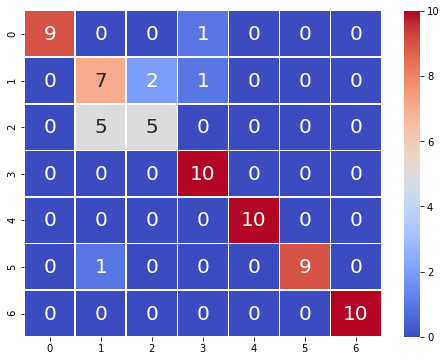

In [56]:
plt.figure(figsize=(8, 6))
heat_map = sb.heatmap(confusion, annot=True, 
                      cmap='coolwarm', 
                      xticklabels=confusion.columns, yticklabels=confusion.index, 
                      linewidths=.5, 
                      annot_kws={"size": 20})

In [57]:
heat_map.figure.savefig("Heatmap_SVM.png", dpi=400)